<a href="https://colab.research.google.com/github/monica-2213/Flowers_Detection_with_YOLOv8/blob/main/Flowers_Detection_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 52.1 MB/s eta 0:00:00


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.1.42

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.3/235.7 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd /content/drive/MyDrive/Flowers_Dataset

/content/drive/MyDrive/Flowers_Dataset


In [11]:
!ls

classes.txt  data.yaml	runs  test  train  val	yolov8s.pt


In [12]:
#training command
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=100 imgsz=640 batch=16 device=0 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

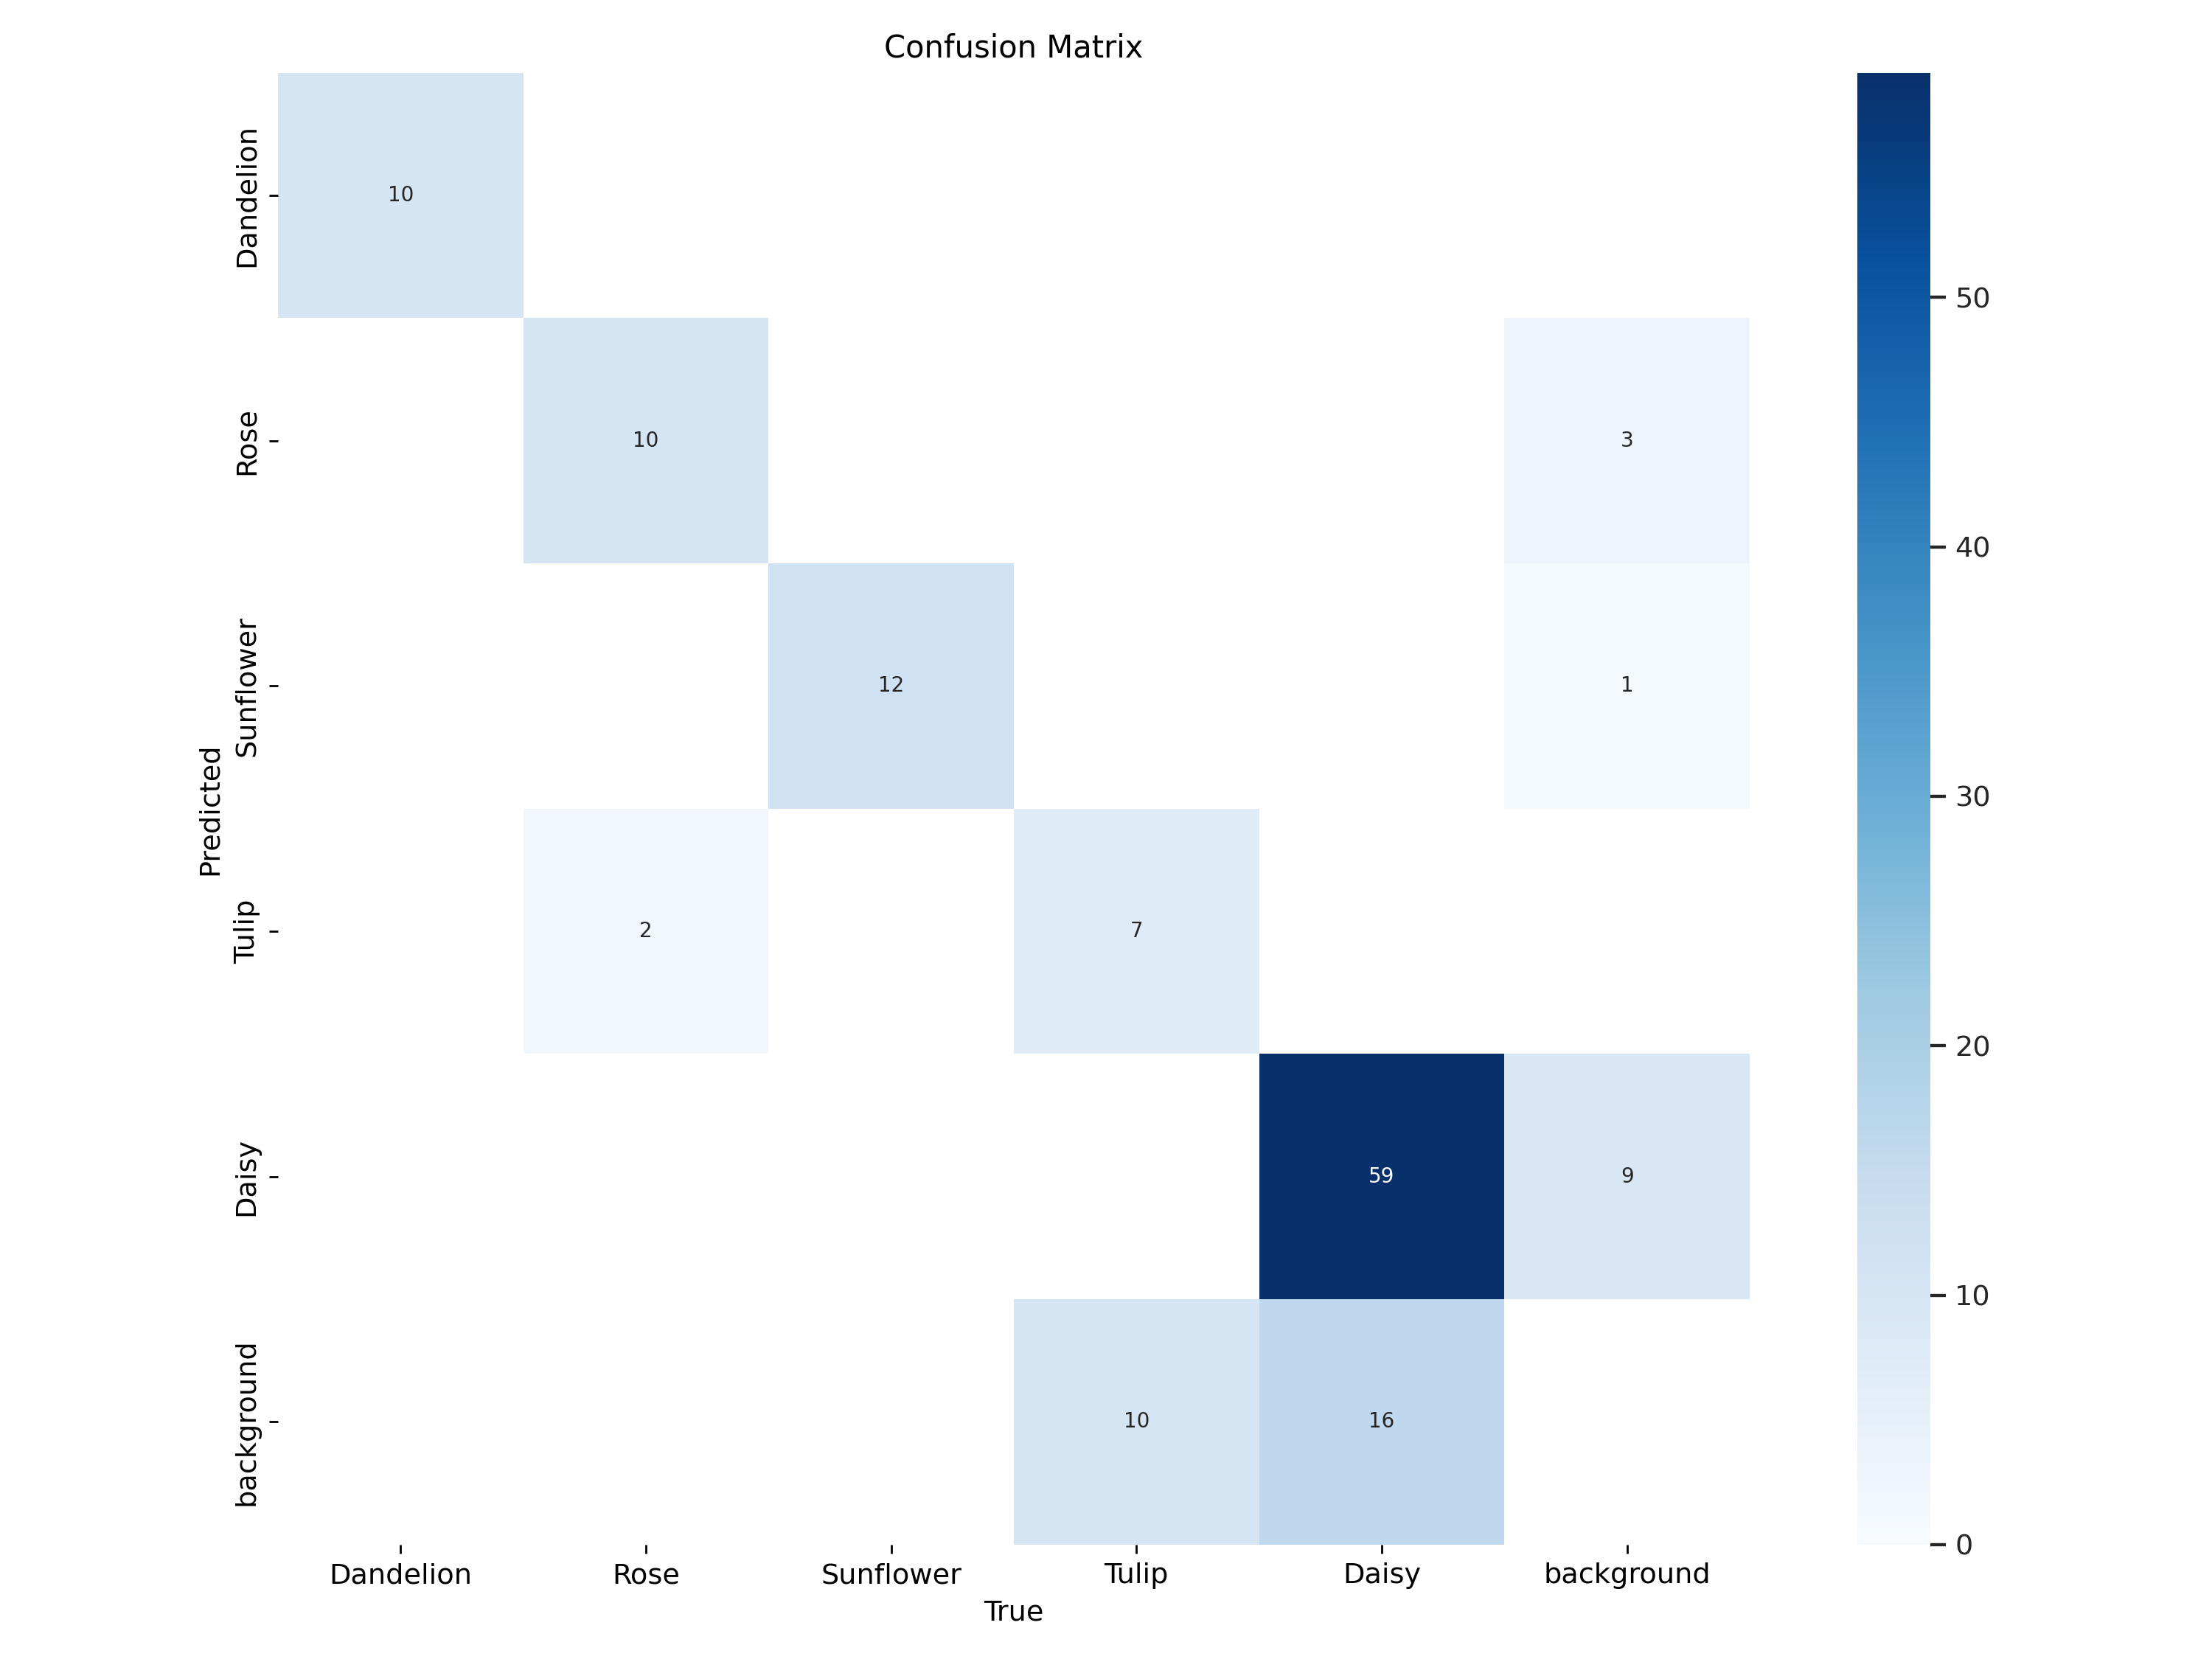

In [13]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=640)

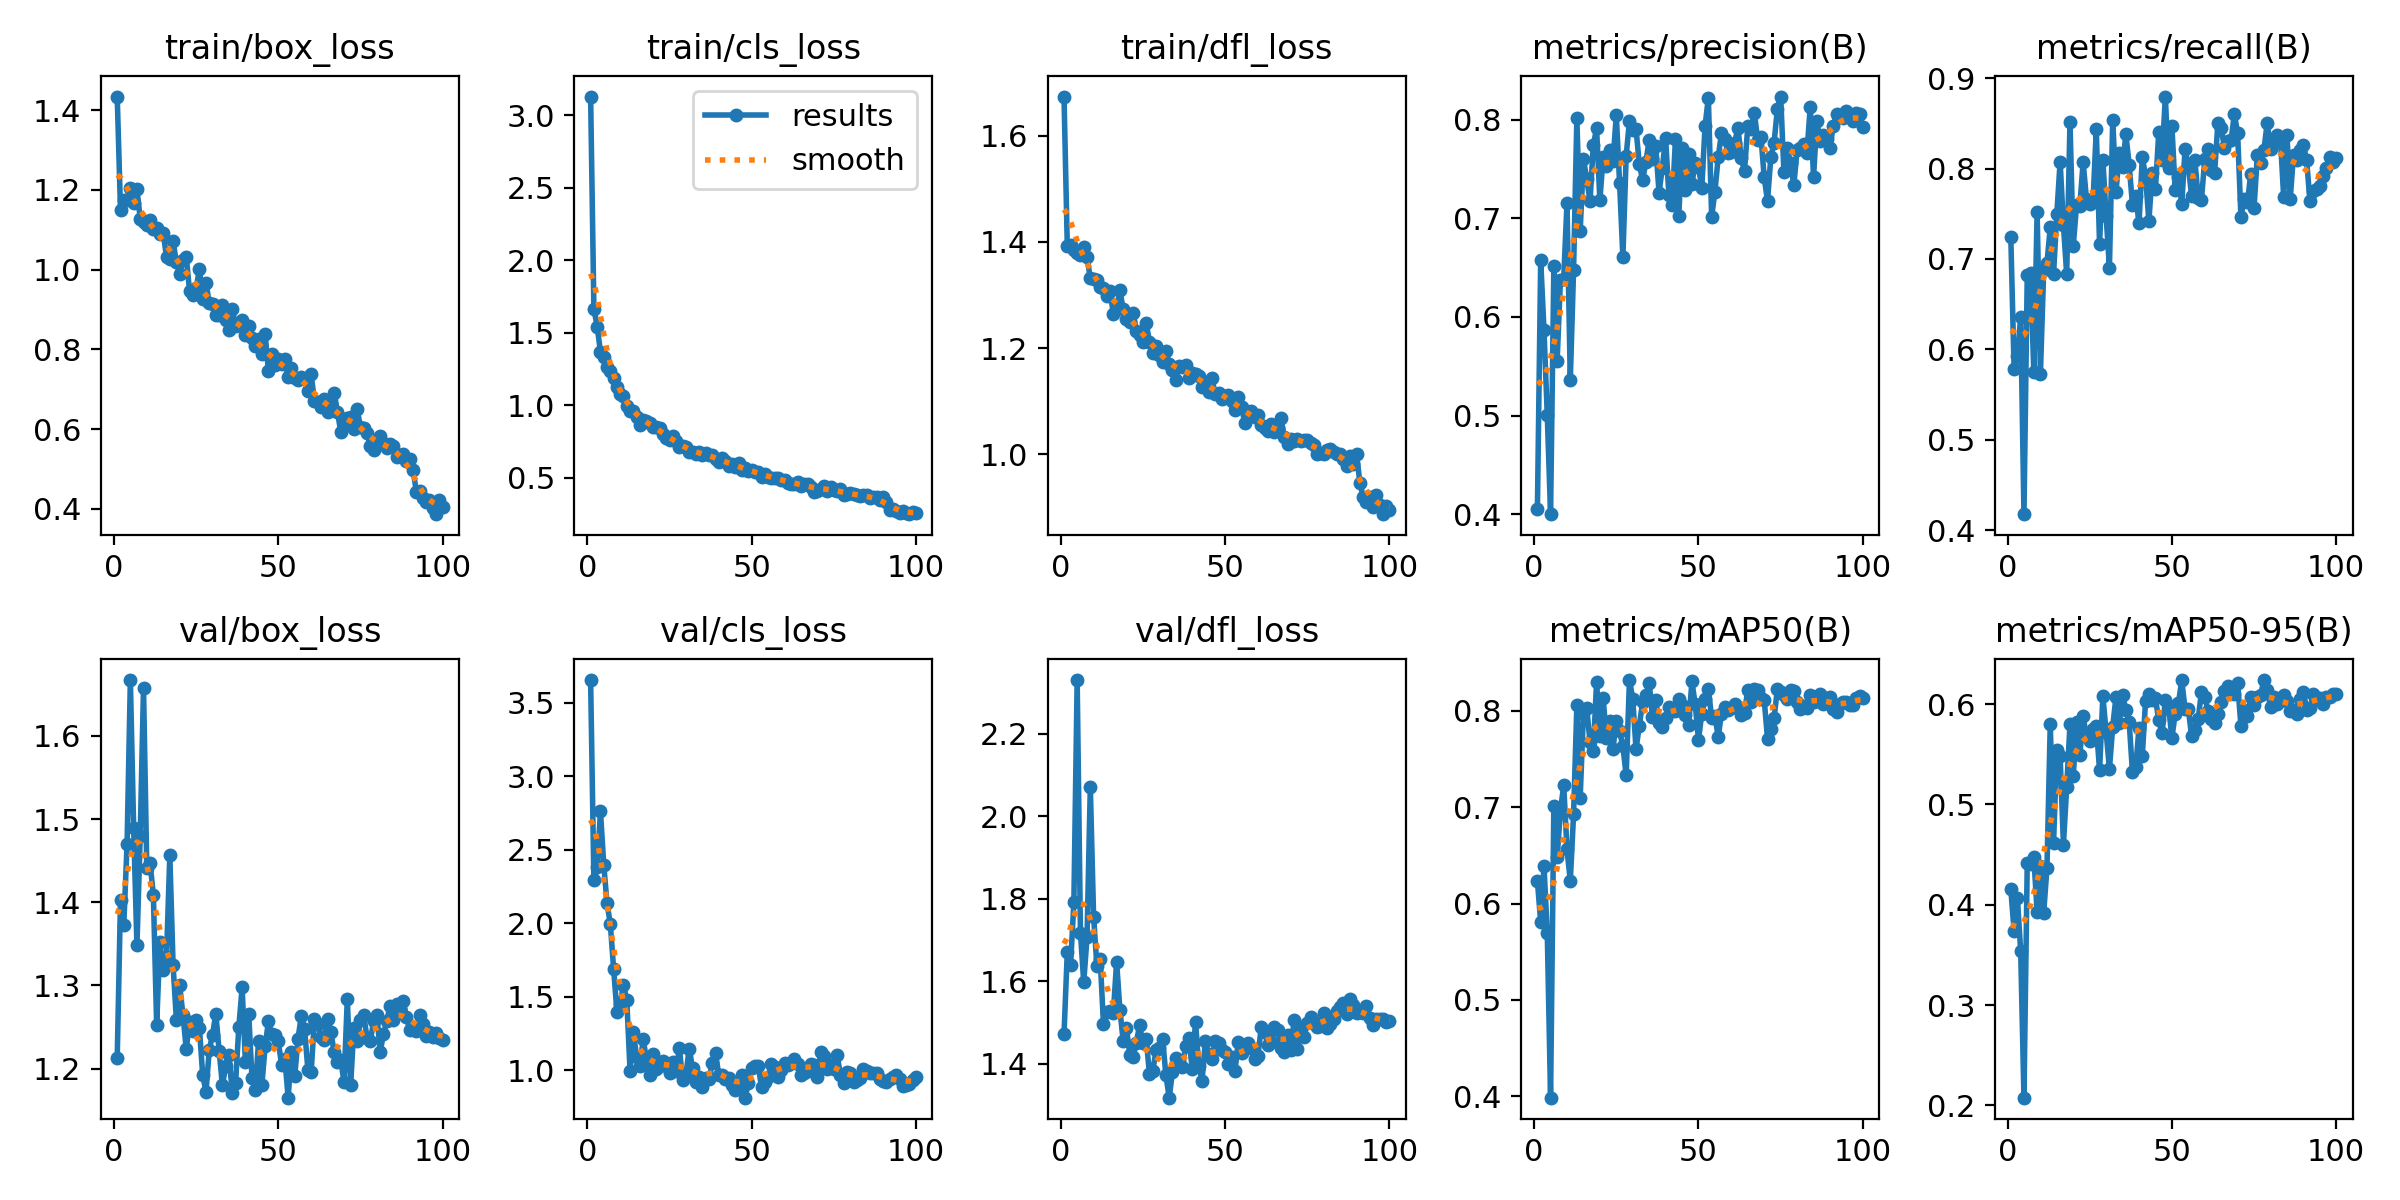

In [14]:
Image(filename='runs/detect/train2/results.png', width=600)

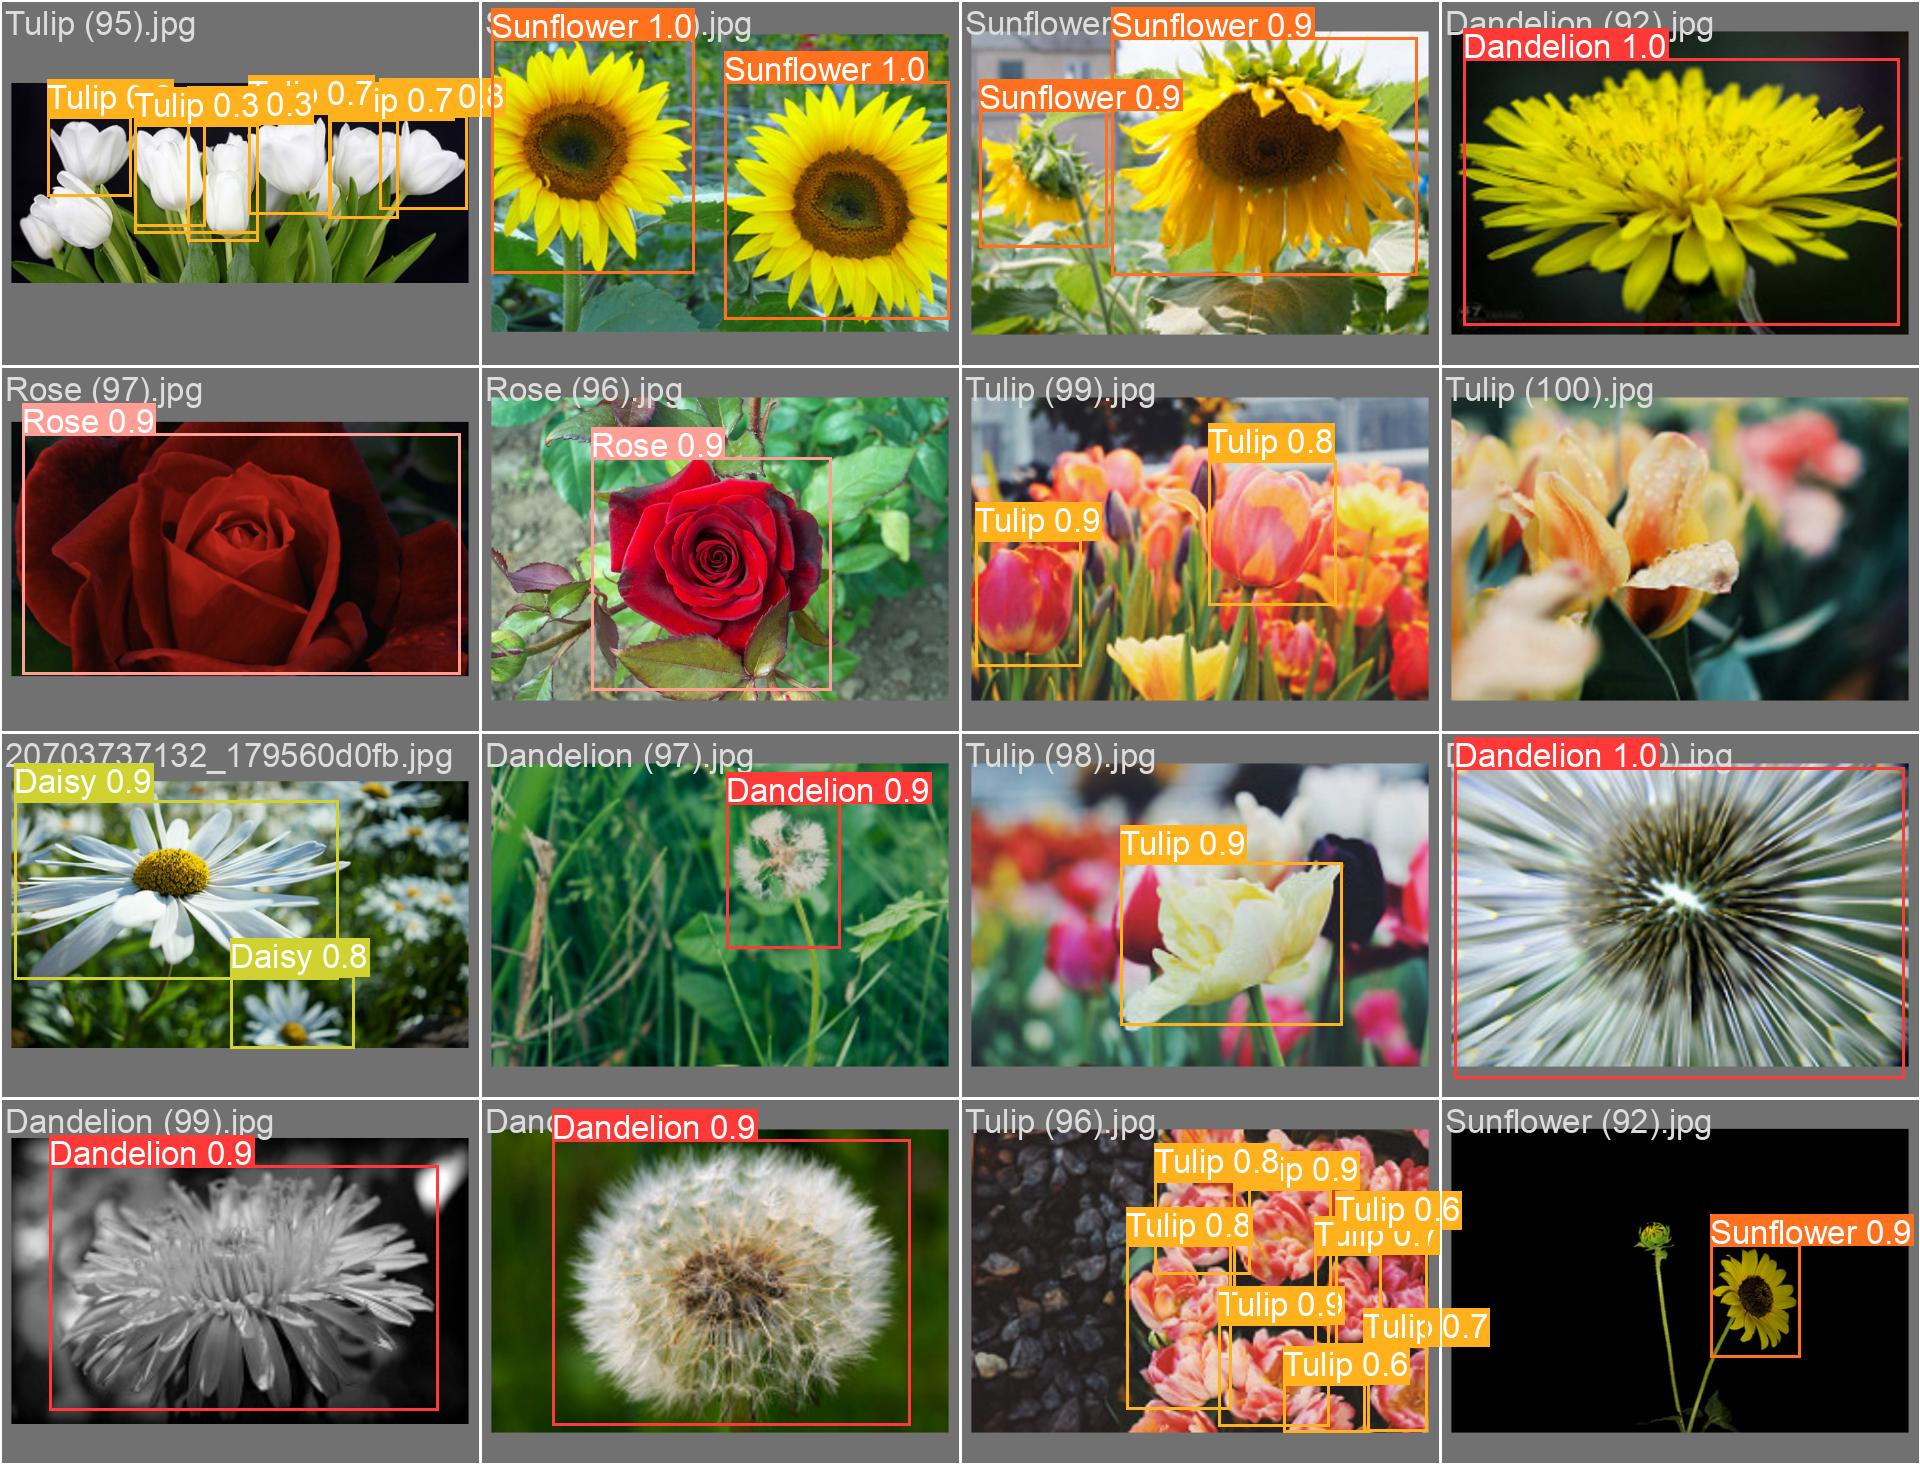

In [15]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

In [16]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [17]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [18]:
infer = YOLO("/content/drive/MyDrive/Flowers_Dataset/runs/detect/train2/weights/best.pt")

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


In [19]:
infer.predict("/content/drive/MyDrive/Flowers_Dataset/test/images", save = True, save_txt = True)


image 1/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18400014056_2e4c601ed5.jpg: 384x640 36 Daisys, 53.2ms
image 2/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18442919723_d1251d3e14_n.jpg: 480x640 1 Daisy, 50.7ms
image 3/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18474740346_ffdaa18032.jpg: 448x640 7 Daisys, 51.4ms
image 4/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18582579815_4c6637e9ff_m.jpg: 640x512 10 Daisys, 50.3ms
image 5/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18622672908_eab6dc9140_n.jpg: 480x640 2 Daisys, 10.1ms
image 6/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18635898912_eb8e058ef0.jpg: 320x640 1 Tulip, 3 Daisys, 50.6ms
image 7/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18679421522_3be9879e32.jpg: 352x640 2 Roses, 2 Daisys, 51.5ms
image 8/100 /content/drive/MyDrive/Flowers_Dataset/test/images/18711159980_11d3bd5042.jpg: 416x640 1 Daisy, 51.0ms
image 9/100 /content/drive/MyDrive/Flowers_Data

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Dandelion', 1: 'Rose', 2: 'Sunflower', 3: 'Tulip', 4: 'Daisy'}
 obb: None
 orig_img: array([[[156, 174, 175],
         [133, 151, 152],
         [147, 165, 166],
         ...,
         [  6,  48,  31],
         [ 13,  52,  36],
         [ 16,  54,  36]],
 
        [[173, 191, 192],
         [123, 141, 142],
         [116, 131, 133],
         ...,
         [  0,  36,  20],
         [  4,  37,  22],
         [  9,  38,  23]],
 
        [[178, 196, 197],
         [154, 169, 171],
         [123, 138, 140],
         ...,
         [  0,  25,  12],
         [  0,  22,   9],
         [  1,  24,  10]],
 
        ...,
 
        [[194, 191, 186],
         [168, 169, 165],
         [145, 150, 149],
         ...,
         [  0,  42,  22],
         [  0,  51,  31],
         [  4,  59,  40]],
 
        [[192, 190, 182],
         [185, 185, 179],
    